In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv',encoding='unicode_escape')
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [5]:
data.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [8]:
data.drop(columns=['released_day','in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts'],inplace=True)

In [9]:
data.isnull().mean()*100

track_name              0.00000
artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
in_spotify_playlists    0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_deezer_playlists     0.00000
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
dtype: float64

In [10]:
data['key'] = data['key'].fillna('No Record')

In [11]:
data.duplicated().sum()

0

In [12]:
data.duplicated(subset='track_name').sum()

10

In [13]:
data[data['track_name'].duplicated(keep=False)]

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12211,1316855716,300,745,118,No Record,Major,71,65,68,6,0,3,7
13,Daylight,David Kushner,1,2023,4,3528,387570742,80,182,130,D,Minor,51,32,43,83,0,9,3
47,Die For You,The Weeknd,1,2016,11,2483,1647990401,68,24,134,C#,Minor,59,51,52,9,0,15,7
178,SNAP,Rosa Linn,1,2022,3,3202,726307468,148,226,170,No Record,Major,56,53,64,11,0,45,6
331,Numb,Linkin Park,1,2003,3,20111,1361425037,39,"7,341",110,A,Major,50,24,86,0,0,64,4
335,Miss You,"Robin Schulz, Oliver Tree",2,2022,8,5730,497225336,108,197,145,F#,Minor,59,20,74,1,0,15,5
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,629,303216294,32,9,94,G#,Major,73,65,79,5,2,11,6
372,About Damn Time,Lizzo,1,2022,7,2332,723894473,0,25,109,A#,Minor,84,72,74,10,0,34,7
417,Die For You,Joji,1,2022,11,1703,246390068,38,36,148,G#,Major,47,15,52,38,13,29,5
448,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1,1959,11,6512,446390129,88,277,134,C#,Major,45,72,24,91,0,18,4


In [14]:
data.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
in_spotify_playlists    879
streams                 949
in_apple_playlists      234
in_deezer_playlists     348
bpm                     124
key                      12
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0
danceability_%,953.0,66.969570,14.630610,23.0,57.0,69.0,78.0,96.0
valence_%,953.0,51.431270,23.480632,4.0,32.0,51.0,70.0,97.0
energy_%,953.0,64.279119,16.550526,9.0,53.0,66.0,77.0,97.0
acousticness_%,953.0,27.057712,25.996077,0.0,6.0,18.0,43.0,97.0


In [16]:
Released_year = data.released_year.value_counts().reset_index()

In [17]:
Released_year.sort_values

<bound method DataFrame.sort_values of     released_year  count
0            2022    402
1            2023    175
2            2021    119
3            2020     37
4            2019     36
5            2017     23
6            2016     18
7            2014     13
8            2013     13
9            2015     11
10           2018     10
11           2012     10
12           2011     10
13           2010      7
14           2002      6
15           1999      5
16           1984      4
17           2000      4
18           2004      4
19           1963      3
20           1958      3
21           1995      2
22           1970      2
23           1959      2
24           1985      2
25           1957      2
26           1986      2
27           2003      2
28           1991      2
29           2008      2
30           1975      2
31           1982      2
32           1946      1
33           2005      1
34           1942      1
35           1996      1
36           1998      1
37         

In [18]:
data['released_month']

0       7
1       3
2       6
3       8
4       5
       ..
948    11
949    10
950    11
951    10
952    11
Name: released_month, Length: 953, dtype: int64

**No. of Releases in each month**

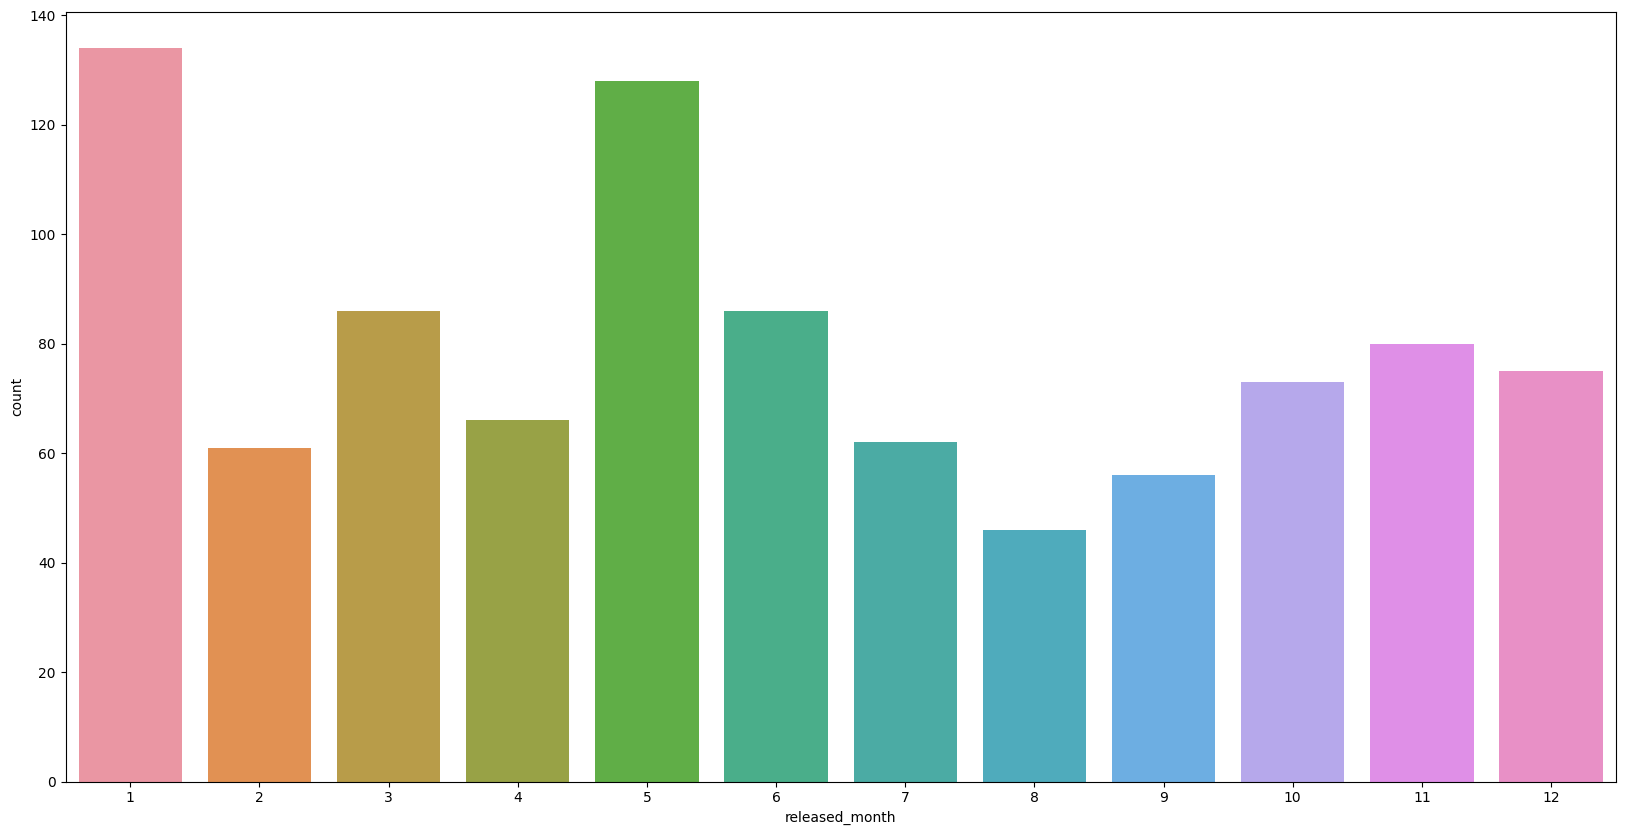

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="released_month"),;

**Distribution of Streams Across Different Months**

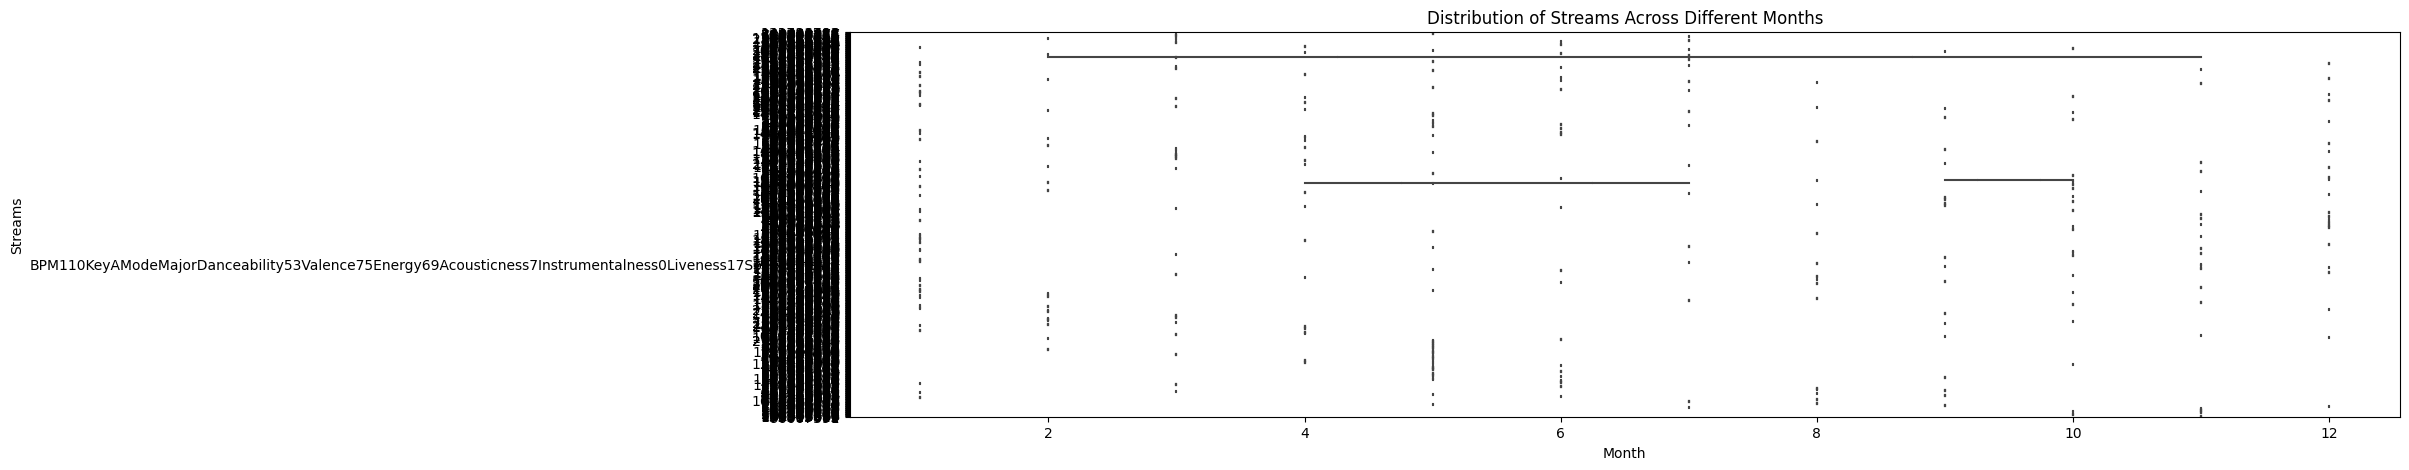

In [20]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='released_month', y='streams', data=data)
plt.title('Distribution of Streams Across Different Months')
plt.xlabel('Month')
plt.ylabel('Streams')
plt.show();

**Artist with most release**

In [21]:
artist_nsong = data['artist(s)_name'].value_counts()

In [22]:
artist_nsong.head(1)

artist(s)_name
Taylor Swift    34
Name: count, dtype: int64

**Song with highest stream hour**

In [23]:
song_streamh = data[['track_name','artist(s)_name','released_year','streams']].\
               sort_values(by = 'streams',ascending=False)

In [24]:
song_streamh.head(1)

,track_name,artist(s)_name,released_year,streams
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1970,BPM110KeyAModeMajorDanceability53Valence75Ener...


**Song with least stream hour**

In [25]:
song_streamh.tail(1)

,track_name,artist(s)_name,released_year,streams
301,"Arcï¿½ï¿½ngel: Bzrp Music Sessions, Vol","Arcangel, Bizarrap",2023,100409613


**Artist with most release (Top10)**

In [26]:
artist_nsong10 = artist_nsong.head(10)

In [27]:
artist_nsong10

artist(s)_name
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: count, dtype: int64

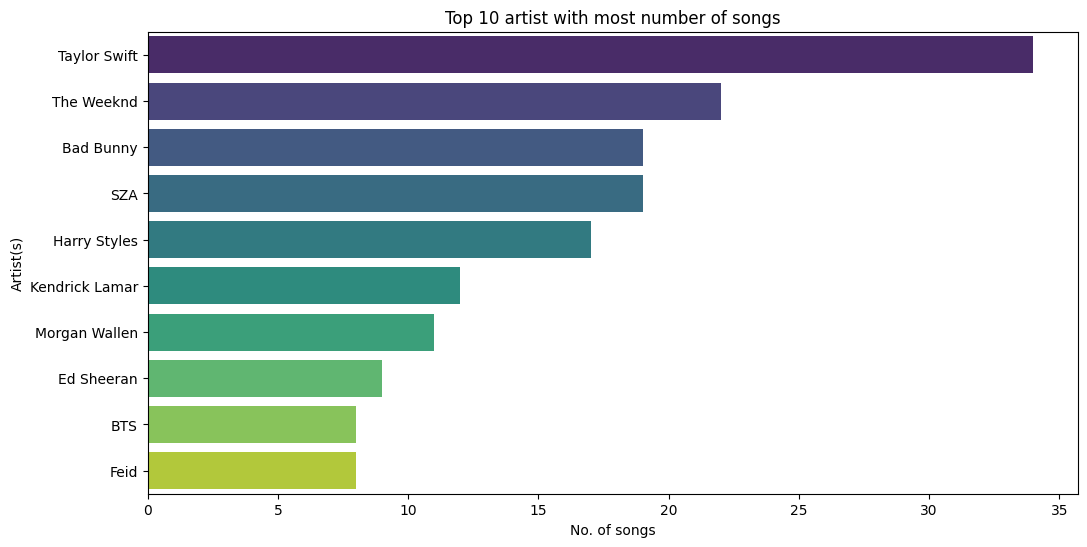

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=artist_nsong10.values,y=artist_nsong10.index,palette='viridis')
plt.xlabel('No. of songs')
plt.ylabel('Artist(s)')
plt.title('Top 10 artist with most number of songs')
plt.show;

**Song with total stream hour (Top 10)**

In [29]:
song_streamh10 = song_streamh.head(10)

In [30]:
song_streamh10.sort_values

<bound method DataFrame.sort_values of                                 track_name                 artist(s)_name  \
574    Love Grows (Where My Rosemary Goes)              Edison Lighthouse   
33                               Anti-Hero                   Taylor Swift   
625                                 Arcade                Duncan Laurence   
253                          Glimpse of Us                           Joji   
455                         Seek & Destroy                            SZA   
98                      Summertime Sadness                   Lana Del Rey   
891  Come Back Home - From "Purple Hearts"                   Sofia Carson   
427                      Where Are You Now  Lost Frequencies, Calum Scott   
322                          I Love You So                    The Walters   
130                              Queencard                       (G)I-DLE   

     released_year                                            streams  
574           1970  BPM110KeyAModeMajorDa

**Correlation Heatmap: Audio Features**

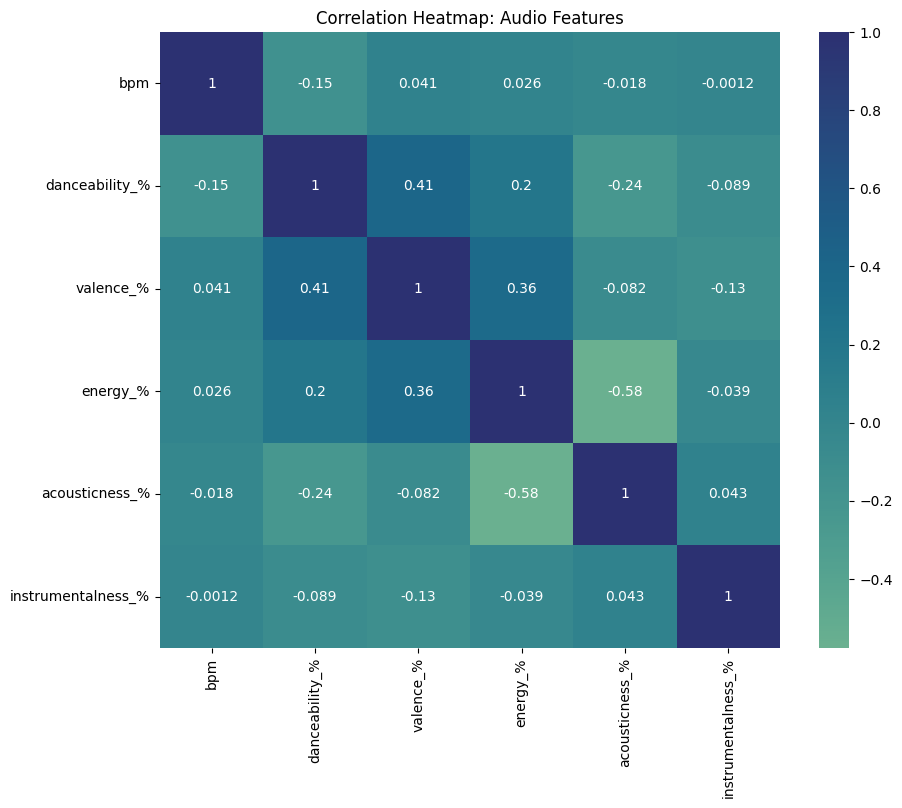

In [31]:
audio_features_columns = ['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%']

correlation_matrix = data[audio_features_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', center=0)
plt.title('Correlation Heatmap: Audio Features')
plt.show()

**Music mode**

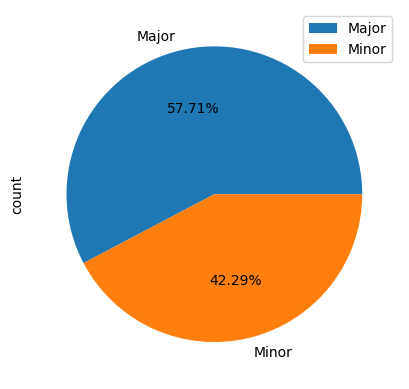

In [32]:
data['mode'].value_counts().plot.pie(autopct = '%1.2f%%', legend = True);

**Correlation between BPM and Dancebility**

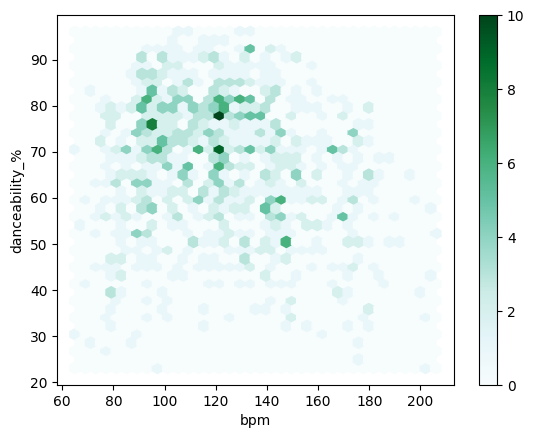

In [33]:
data.plot.hexbin('bpm','danceability_%',gridsize=35);

**number of tracks released each month in 2023 varied over time**

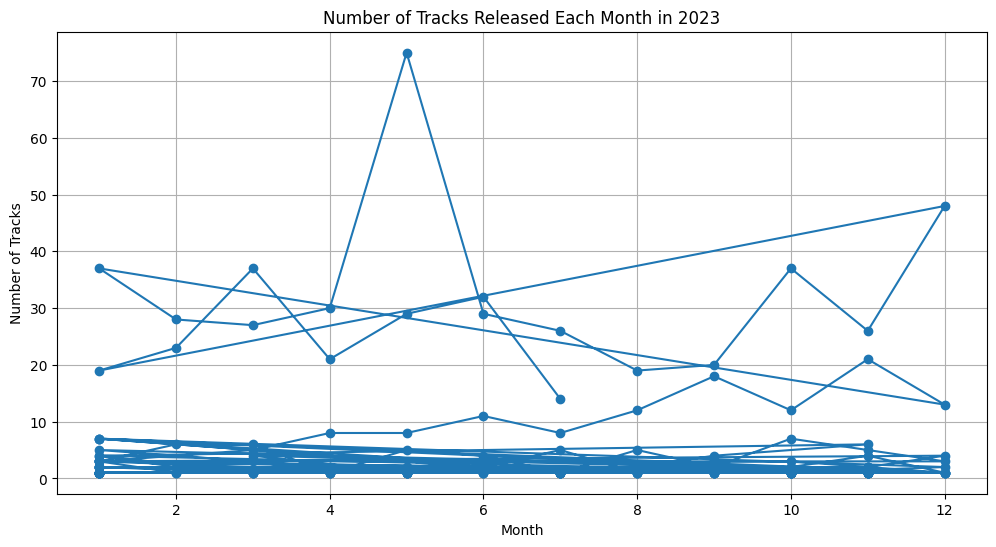

In [34]:
monthly_track_counts = data.groupby(['released_year', 'released_month'])['track_name'].count().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_track_counts['released_month'], monthly_track_counts['track_name'], marker='o', linestyle='-')
plt.title('Number of Tracks Released Each Month in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.grid(True)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.show()


**artists with the most tracks in Spotify playlists**

In [35]:
# Assuming 'artist(s)_name' is the column containing artist names
# Group the data by artist and count the number of tracks for each artist
artist_track_counts = data['artist(s)_name'].value_counts().reset_index()
artist_track_counts.columns = ['Artist', 'Track Count']

# Sort the data by track count in descending order to get the top artists
artist_track_counts = artist_track_counts.sort_values(by='Track Count', ascending=False)


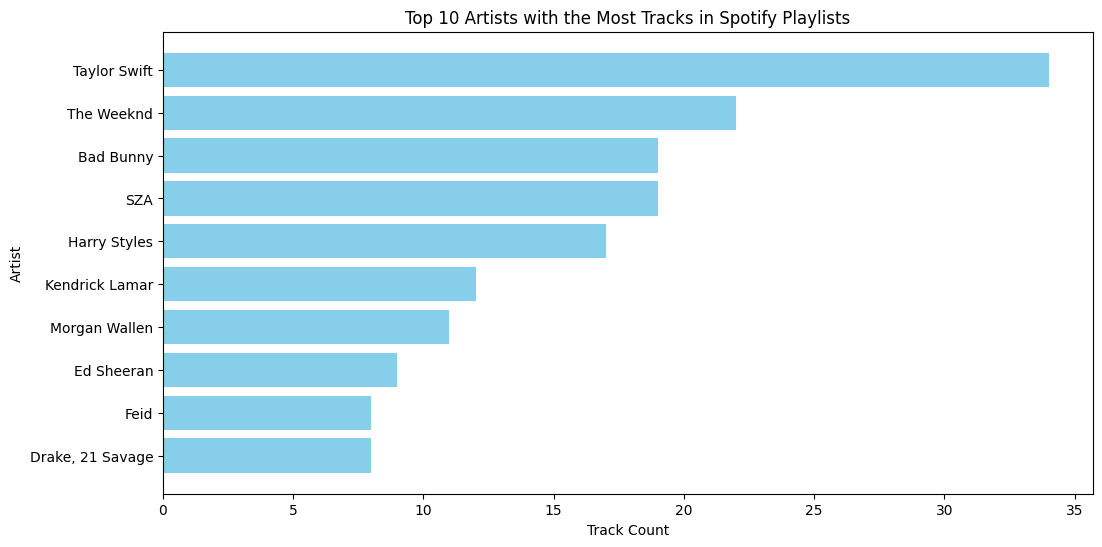

In [36]:
# Set the number of top artists you want to visualize (e.g., top 10)
top_n = 10

# Select the top artists and their track counts
top_artists = artist_track_counts.head(top_n)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_artists['Artist'], top_artists['Track Count'], color='skyblue')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.title(f'Top {top_n} Artists with the Most Tracks in Spotify Playlists')
plt.gca().invert_yaxis()  # Invert the y-axis to display the artist with the most tracks at the top

plt.show()


**patterns between the release month and the number of streams**

In [37]:
# Assuming 'released_month' and 'streams' are the relevant columns
# Filter out rows with missing data in these columns
spotify_data_filtered = data.dropna(subset=['released_month', 'streams'])

# Convert 'released_month' to numeric if it's in string format
# This assumes that the month is represented as a numeric value (e.g., 1 for January)
spotify_data_filtered['released_month'] = pd.to_numeric(spotify_data_filtered['released_month'])


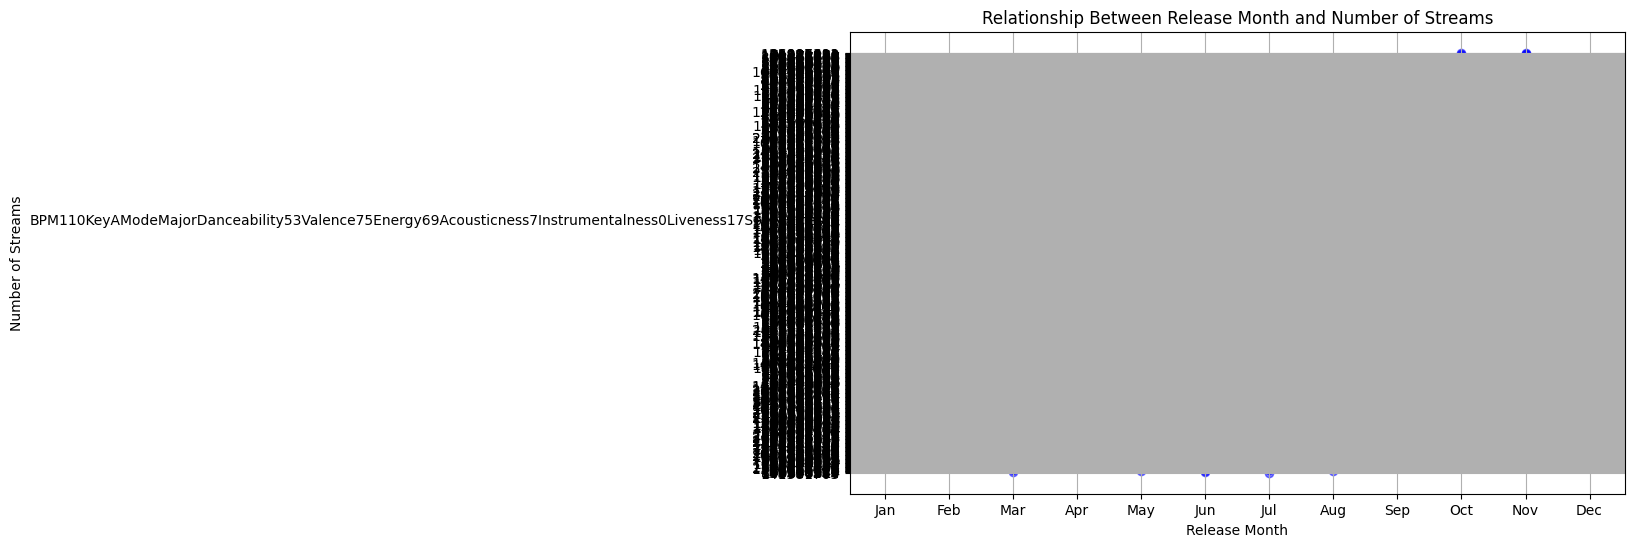

In [38]:
# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(spotify_data_filtered['released_month'], spotify_data_filtered['streams'], alpha=0.5, c='blue')
plt.xlabel('Release Month')
plt.ylabel('Number of Streams')
plt.title('Relationship Between Release Month and Number of Streams')
plt.grid(True)

# Customize the x-axis labels to show month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)

plt.show()


**To visualize the distribution of BPM (beats per minute)**

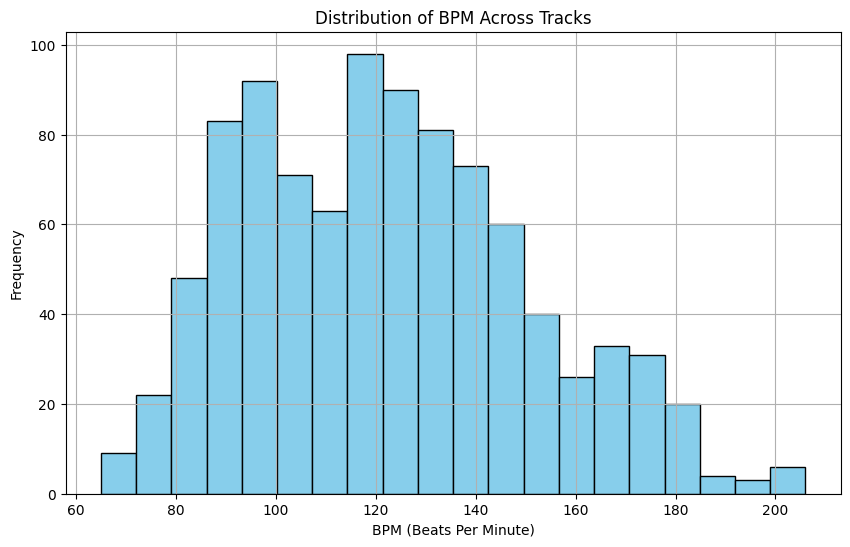

In [39]:
# Assuming 'bpm' is the column containing BPM data
bpm_data = data['bpm']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(bpm_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('BPM (Beats Per Minute)')
plt.ylabel('Frequency')
plt.title('Distribution of BPM Across Tracks')
plt.grid(True)

plt.show()


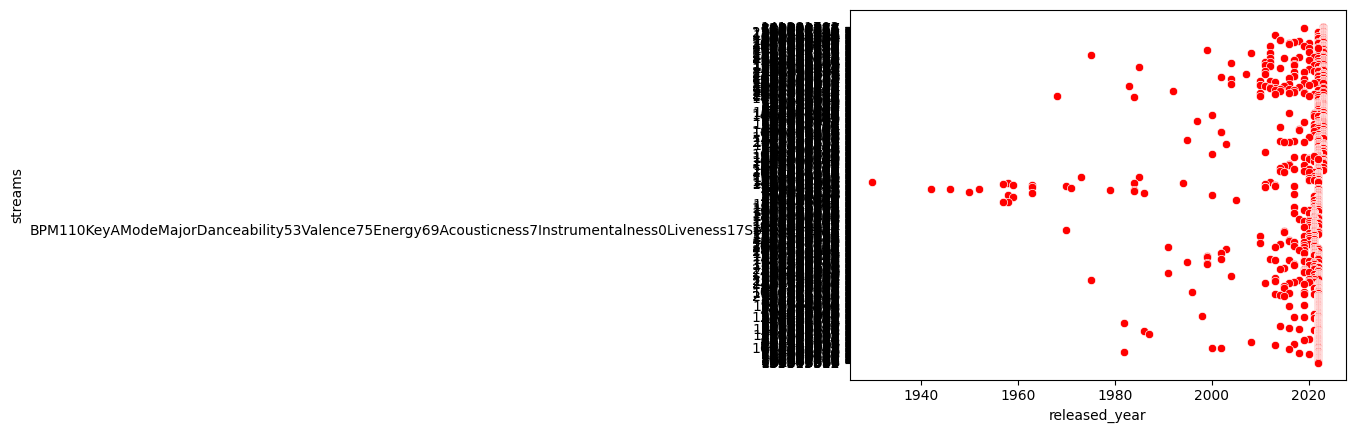

In [40]:
sns.scatterplot(y='streams',x='released_year',data=data,color='red');

**the top instrumental tracks and their chart positions.**

In [41]:
# Assuming 'instrumentalness' and 'in_spotify_charts' are the relevant columns
# Filter out rows with missing data in these columns
spotify_data_filtered = data.dropna(subset=['instrumentalness_%', 'in_spotify_playlists'])


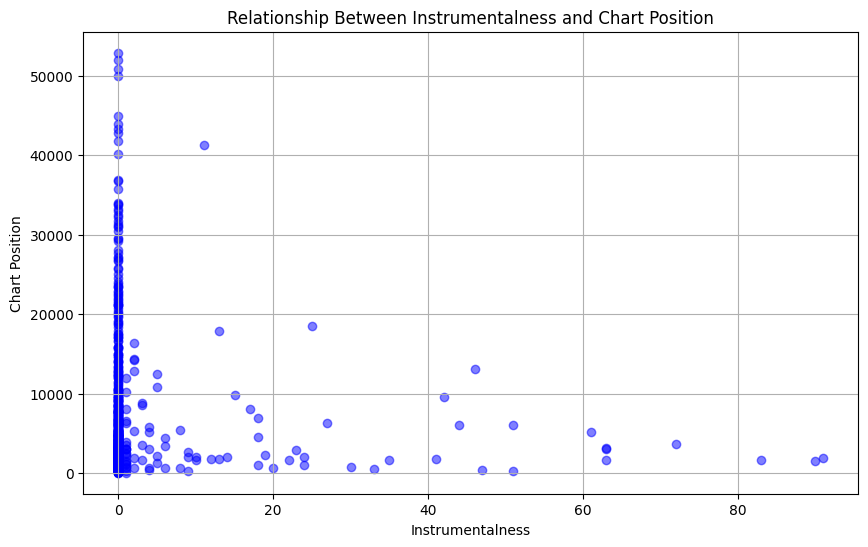

In [42]:
# Assuming 'instrumentalness' is on a scale from 0 to 1, where 0 is not instrumental and 1 is completely instrumental
instrumentalness_data = spotify_data_filtered['instrumentalness_%']
chart_positions_data = spotify_data_filtered['in_spotify_playlists']

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(instrumentalness_data, chart_positions_data, alpha=0.5, c='blue')
plt.xlabel('Instrumentalness')
plt.ylabel('Chart Position')
plt.title('Relationship Between Instrumentalness and Chart Position')
plt.grid(True)

plt.show()


**Is there a relationship between energy levels and acousticness? Scatterplots or a correlation matrix can reveal this.**

In [43]:
# Assuming 'energy_' and 'acousticness_' are the relevant columns
# Filter out rows with missing data in these columns
spotify_data_filtered = data.dropna(subset=['energy_%', 'acousticness_%'])


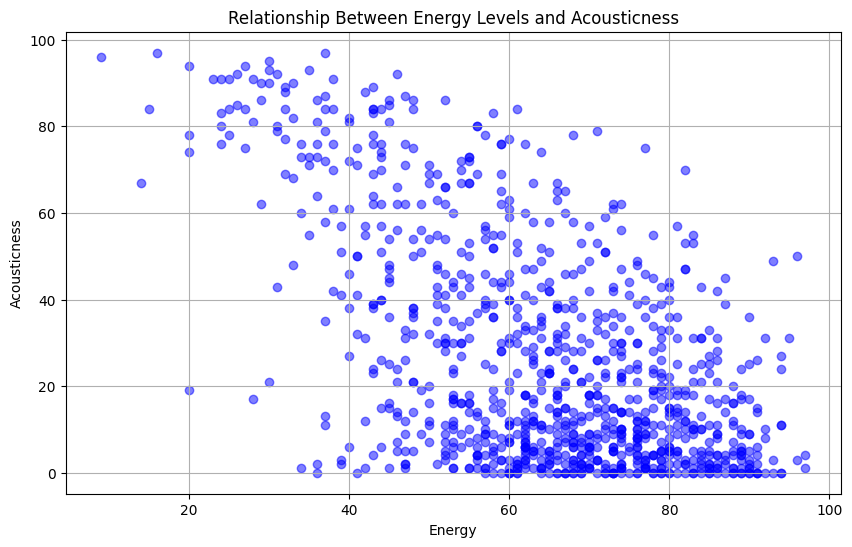

In [44]:
# Assuming 'energy_' and 'acousticness_' are on a scale from 0 to 1
energy_data = spotify_data_filtered['energy_%']
acousticness_data = spotify_data_filtered['acousticness_%']

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(energy_data, acousticness_data, alpha=0.5, c='blue')
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.title('Relationship Between Energy Levels and Acousticness')
plt.grid(True)

plt.show()


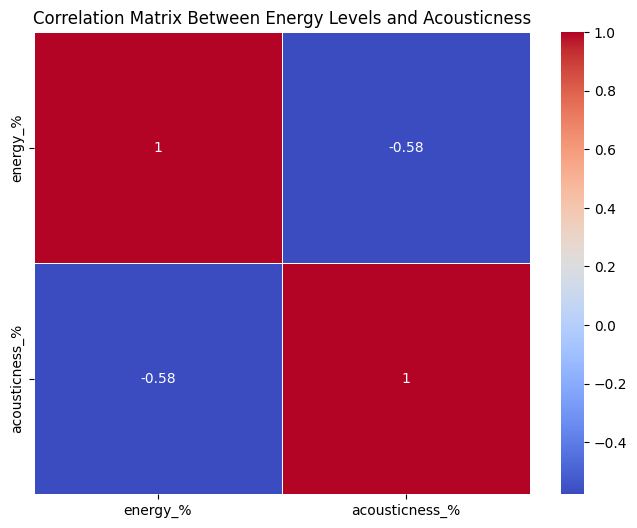

In [45]:
# Create a DataFrame with the selected columns
correlation_data = spotify_data_filtered[['energy_%', 'acousticness_%']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between Energy Levels and Acousticness')
plt.show()


**To explore whether certain keys or modes correlate with higher danceability or valence percentages**

In [46]:
# Assuming these are the relevant columns
# Filter out rows with missing data in these columns
spotify_data_filtered = data.dropna(subset=['key', 'mode', 'danceability_%', 'valence_%'])


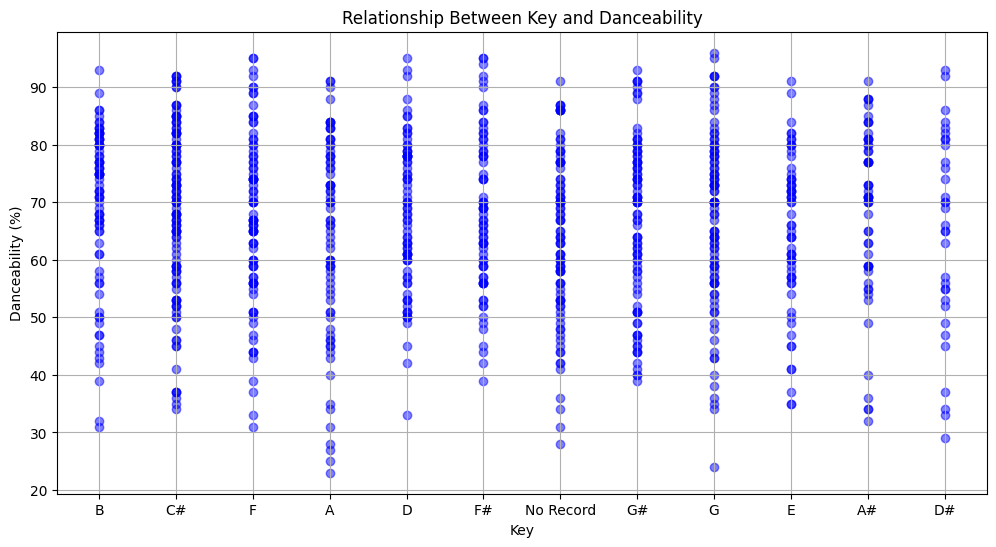

In [47]:
# Assuming 'key' is categorical and 'danceability_%' is a continuous variable
key_data = spotify_data_filtered['key']
danceability_data = spotify_data_filtered['danceability_%']

# Create a scatterplot for danceability by key
plt.figure(figsize=(12, 6))
plt.scatter(key_data, danceability_data, alpha=0.5, c='blue')
plt.xlabel('Key')
plt.ylabel('Danceability (%)')
plt.title('Relationship Between Key and Danceability')
plt.grid(True)

plt.show()


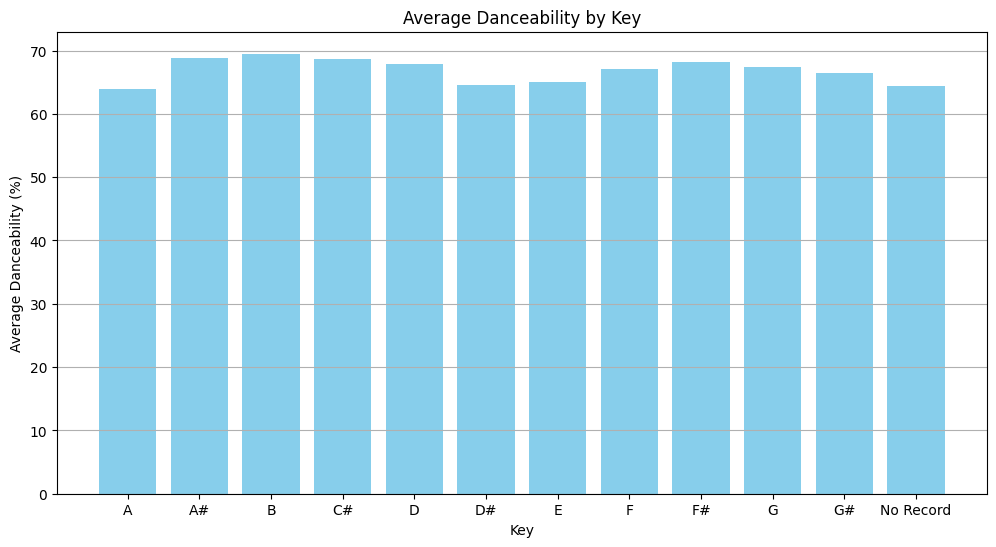

In [48]:
# Group the data by key and calculate the mean danceability for each key
key_danceability_means = spotify_data_filtered.groupby('key')['danceability_%'].mean().reset_index()

# Assuming there are 12 keys (0 to 11)
keys = np.arange(12)
danceability_means = key_danceability_means['danceability_%']

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(keys, danceability_means, tick_label=key_danceability_means['key'], color='skyblue')
plt.xlabel('Key')
plt.ylabel('Average Danceability (%)')
plt.title('Average Danceability by Key')
plt.xticks(keys, key_danceability_means['key'])
plt.grid(axis='y')

plt.show()


In [49]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'in_spotify_playlists', 'streams',
       'in_apple_playlists', 'in_deezer_playlists', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')